In [2]:
import numpy as np
import pandas as pd
import xarray as xr
import csv
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import plot_geographic_maps as pgm

# Plot map area

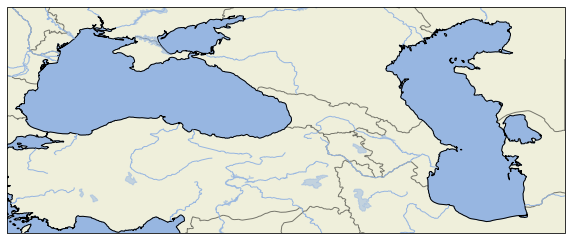

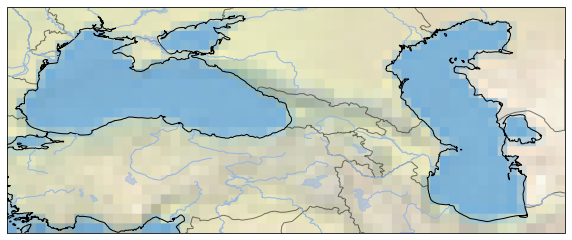

In [3]:
west = 27
east = 56
south = 36
north = 47

central_longitude = (east + west) / 2

fig = plt.figure(figsize = [10,10])
#ax = fig.add_subplot(1, 1, 1, projection = ccrs.PlateCarree(central_longitude = central_longitude))
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude = central_longitude))
pgm.plot_map_area(ax, [west, east, south, north], detailing = False)

fig = plt.figure(figsize = [10,10])
#ax = fig.add_subplot(1, 1, 1, projection = ccrs.PlateCarree(central_longitude = central_longitude))
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude = central_longitude))
pgm.plot_map_area(ax, [west, east, south, north], detailing = True)

# Trying to plot rainfall

In [5]:
path = 'TRMM/TRMM_prc_1998_2019_6h_0.25/'
pref = '1998_2019_6h_0.25'

times = np.asarray(pd.read_csv(path + 'times_1998_2019_6h.txt', sep = '\n', header = None)[0])
lat = np.asarray(pd.read_csv(path + 'lat_TRMM_prc_1998_2019_6h_0.25.csv', sep = ',', header = None))[0]
lon = np.asarray(pd.read_csv(path + 'lon_TRMM_prc_1998_2019_6h_0.25.csv', sep = ',', header = None))[0]

arr = np.load(path + 'resulting_cube_TRMM_prc_' + pref + '.npz')
resulting_cube = arr['arr_0']
print('resulting_cube.shape, ', resulting_cube.shape)

n_time, n_lat, n_lon = resulting_cube.shape
print('n_time = ', n_time)
print('n_lat = ', n_lat)
print('n_lon = ', n_lon)

data = xr.DataArray(resulting_cube, dims=('time', 'lat', 'lon'), coords = {'time': times, 'lat': lat, 'lon': lon})

resulting_cube.shape,  (32140, 45, 117)
n_time =  32140
n_lat =  45
n_lon =  117


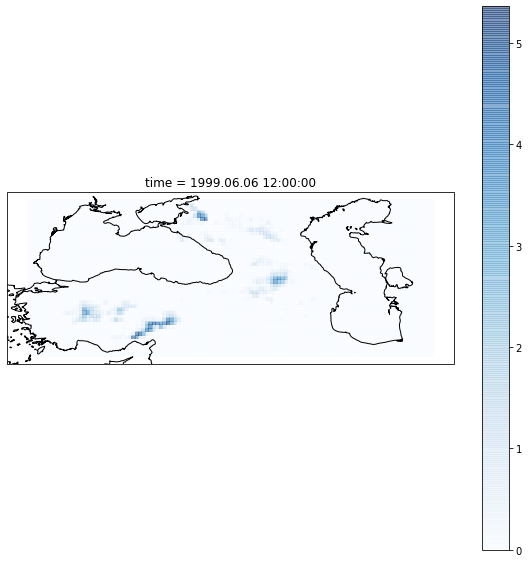

In [6]:
west = 27
east = 56
south = 36
north = 47

central_longitude = (east + west) / 2

fig = plt.figure(figsize = [10,10])

# 111 means 1 row, 1 col and index 1
#ax = fig.add_subplot(1, 1, 1, projection = ccrs.PlateCarree(central_longitude = central_longitude))
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude = central_longitude))
data.sel(time = '1999.06.06 12:00:00').plot(ax = ax, cmap = 'Blues', transform = ccrs.PlateCarree(), alpha=.5)

#ax.stock_img()
ax.coastlines()

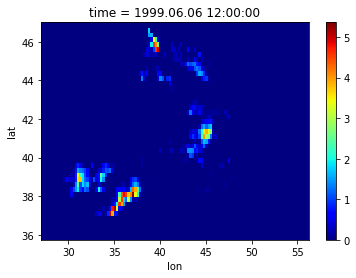

In [7]:
data.sel(time = '1999.06.06 12:00:00').plot(cmap = 'jet')

# Connect dots with a line

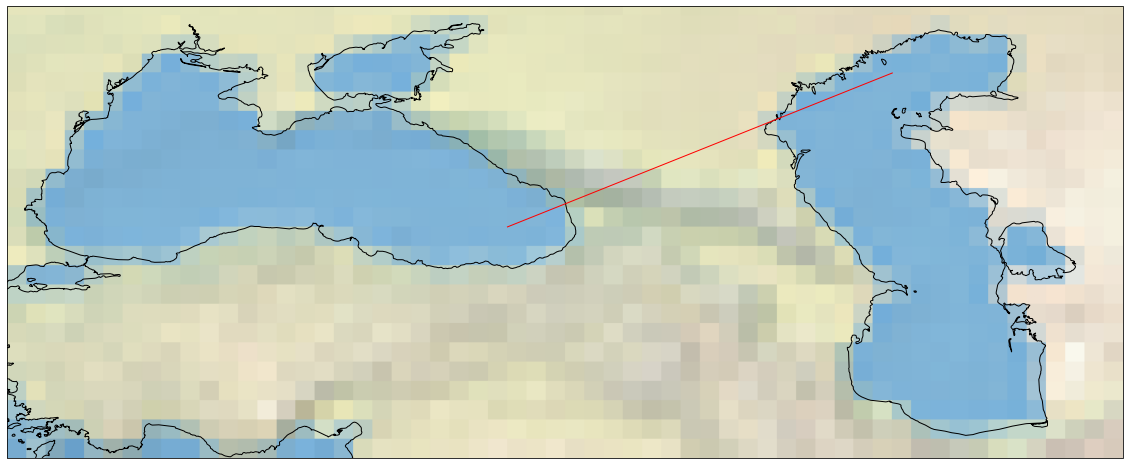

In [8]:
west = 27
east = 56
south = 36
north = 47

central_longitude = (east + west) / 2

fig = plt.figure(figsize = [20,20])
#ax = fig.add_subplot(1, 1, 1, projection = ccrs.PlateCarree(central_longitude = central_longitude))
ax = plt.axes(projection = ccrs.PlateCarree(central_longitude = central_longitude))

ax.set_extent([west, east, south, north])

ax.plot([40, 50], [42, 46], c = 'r', lw = 1, transform = ccrs.PlateCarree())

#ax.arrow(40, 42, 50-40, 46-42, width = 0.05, head_length = 0.5, color = 'r', transform = ccrs.PlateCarree())

ax.stock_img()

#ax.add_feature(cfeature.OCEAN)
#ax.add_feature(cfeature.LAND)
#ax.add_feature(cfeature.LAKES)
#ax.add_feature(cfeature.BORDERS)
#ax.add_feature(cfeature.COASTLINE)
#ax.add_feature(cfeature.RIVERS)

ax.coastlines()